In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, confusion_matrix, precision_score, plot_roc_curve, auc

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
sns.set()

# 1) Importing Data

In [3]:
# Specify path to csv file

# Read csv
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
# Preview dataset
train.head()

,employee_id,umur,jenis_kelamin,IPK,level,tahun_lulus,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,kecelakaan_kerja,promosi_5thn_lalu,tingkat_gaji,resign
0,10000,NaN,Laki-laki,1.947303,Junior,NaN,Sudah Menikah,management,210.0,0.82,0.419035,3,3 Years,belum pernah,belum,sedang,0
1,10001,NaN,Laki-laki,3.218346,Full-Time,NaN,Belum Menikah,sales,189.0,0.76,0.558254,3,24 Months,belum pernah,belum,rendah,0
2,10002,NaN,Laki-laki,2.117364,Senior,NaN,Sudah Menikah,management,NaN,0.81,0.580364,5,2 Years,pernah,belum,tinggi,0
3,10003,NaN,Laki-laki,3.178748,Full-Time,NaN,Belum Menikah,sales,121.0,0.84,0.446109,3,36 Months,pernah,belum,rendah,0
4,10004,34.0,Laki-laki,2.680535,Part-Time,2008.0,Belum Menikah,technical,229.0,0.48,NaN,3,3 Years,belum pernah,belum,rendah,0


## 1.1 Initial Screening

In [5]:
train.shape

(10049, 17)

In [6]:
# Describe numeric columns
train.describe()

,employee_id,umur,IPK,tahun_lulus,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,resign
count,10049.000000,2338.000000,10049.000000,2338.000000,8700.000000,9253.000000,8499.000000,10049.000000,10049.000000
mean,15024.000000,33.499572,2.396161,2008.151839,202.981379,0.611906,0.455847,3.797691,0.238034
std,2901.040762,7.951891,0.868485,7.988843,56.708467,0.247945,0.113812,1.227331,0.425901
min,10000.000000,20.000000,0.003057,1986.000000,96.000000,0.090000,0.000000,2.000000,0.000000
25%,12512.000000,27.000000,1.778721,2003.000000,156.000000,0.440000,0.382326,3.000000,0.000000
50%,15024.000000,32.000000,2.523730,2009.000000,200.000000,0.640000,0.448720,4.000000,0.000000
75%,17536.000000,39.000000,3.091618,2015.000000,246.000000,0.810000,0.522630,5.000000,0.000000
max,20048.000000,55.000000,3.989568,2024.000000,559.000000,1.000000,1.000000,7.000000,1.000000


In [7]:
# Column data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10049 entries, 0 to 10048
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employee_id                    10049 non-null  int64  
 1   umur                           2338 non-null   float64
 2   jenis_kelamin                  10049 non-null  object 
 3   IPK                            10049 non-null  float64
 4   level                          10049 non-null  object 
 5   tahun_lulus                    2338 non-null   float64
 6   status_perkawinan              10049 non-null  object 
 7   divisi                         10049 non-null  object 
 8   rerata_jam_bulanan             8700 non-null   float64
 9   tingkat_kepuasan_bekerja       9253 non-null   float64
 10  nilai_evaluasi_terakhir        8499 non-null   float64
 11  jumlah_proyek_yang_dikerjakan  10049 non-null  int64  
 12  lama_di_perusahaan             10049 non-null 

In [8]:
# Missing values per column

train.isna().sum()

employee_id                         0
umur                             7711
jenis_kelamin                       0
IPK                                 0
level                               0
tahun_lulus                      7711
status_perkawinan                   0
divisi                              0
rerata_jam_bulanan               1349
tingkat_kepuasan_bekerja          796
nilai_evaluasi_terakhir          1550
jumlah_proyek_yang_dikerjakan       0
lama_di_perusahaan                  0
kecelakaan_kerja                    0
promosi_5thn_lalu                   0
tingkat_gaji                        0
resign                              0
dtype: int64

In [9]:
# Missing values per column

test.isna().sum()

employee_id                         0
umur                             3880
jenis_kelamin                       0
IPK                                 0
level                               0
tahun_lulus                      3799
status_perkawinan                   0
divisi                              0
rerata_jam_bulanan                588
tingkat_kepuasan_bekerja          466
nilai_evaluasi_terakhir           856
jumlah_proyek_yang_dikerjakan       0
lama_di_perusahaan                  0
kecelakaan_kerja                    0
promosi_5thn_lalu                   0
tingkat_gaji                        0
dtype: int64

In [10]:
# Check for duplicate values
train.duplicated().any()

False

In [11]:
test.duplicated().any()

False

In [12]:
# Label proportion
train['resign'].value_counts()

0    7657
1    2392
Name: resign, dtype: int64

# 2) Exploratory Data Analysis

## 2.1 Numeric Features

In [7]:
train.head()

,employee_id,umur,jenis_kelamin,IPK,level,tahun_lulus,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,kecelakaan_kerja,promosi_5thn_lalu,tingkat_gaji,resign
0,10000,NaN,Laki-laki,1.947303,Junior,NaN,Sudah Menikah,management,210.0,0.82,0.419035,3,3 Years,belum pernah,belum,sedang,0
1,10001,NaN,Laki-laki,3.218346,Full-Time,NaN,Belum Menikah,sales,189.0,0.76,0.558254,3,24 Months,belum pernah,belum,rendah,0
2,10002,NaN,Laki-laki,2.117364,Senior,NaN,Sudah Menikah,management,NaN,0.81,0.580364,5,2 Years,pernah,belum,tinggi,0
3,10003,NaN,Laki-laki,3.178748,Full-Time,NaN,Belum Menikah,sales,121.0,0.84,0.446109,3,36 Months,pernah,belum,rendah,0
4,10004,34.0,Laki-laki,2.680535,Part-Time,2008.0,Belum Menikah,technical,229.0,0.48,NaN,3,3 Years,belum pernah,belum,rendah,0


In [8]:
numeric_cols = ['umur','IPK','rerata_jam_bulanan','tingkat_kepuasan_bekerja','nilai_evaluasi_terakhir']

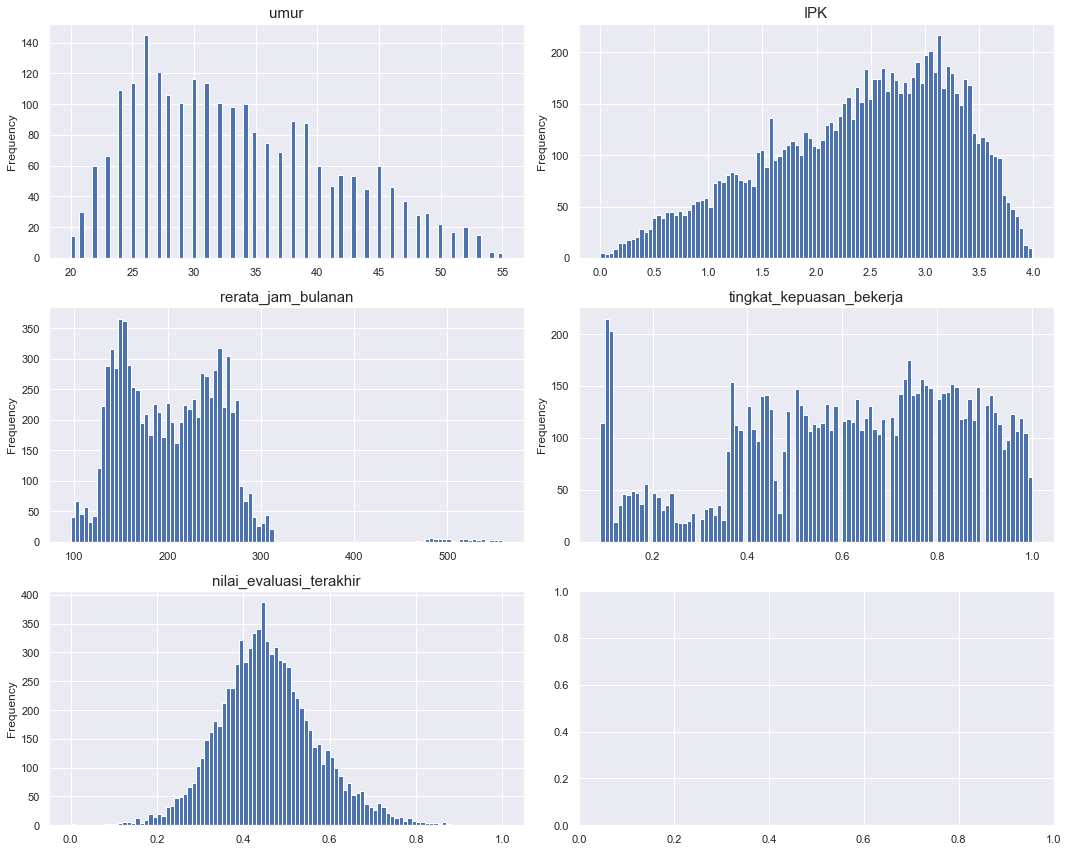

In [9]:
# Plot all hist
f, axes = plt.subplots(3, 2, figsize=(15,3*4)) #5 baris 1 kolom

for ax,col in zip(axes.flatten(), numeric_cols):
    train[col].plot(kind='hist', ax=ax, bins=100)
    ax.set_title(col, fontsize=15)
    
f.tight_layout()

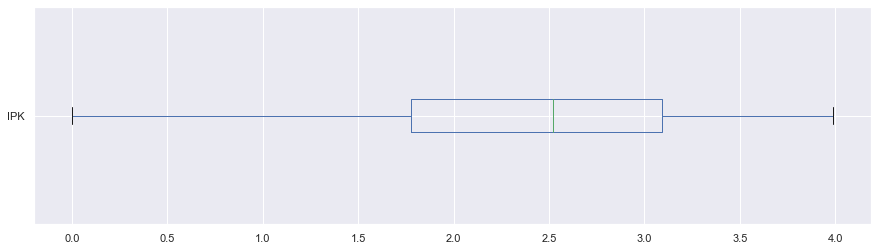

In [143]:
# Box plot
plt.figure(figsize=(15,4))
train['IPK'].plot(kind='box', vert=False)

plt.show()

<Figure size 720x720 with 0 Axes>

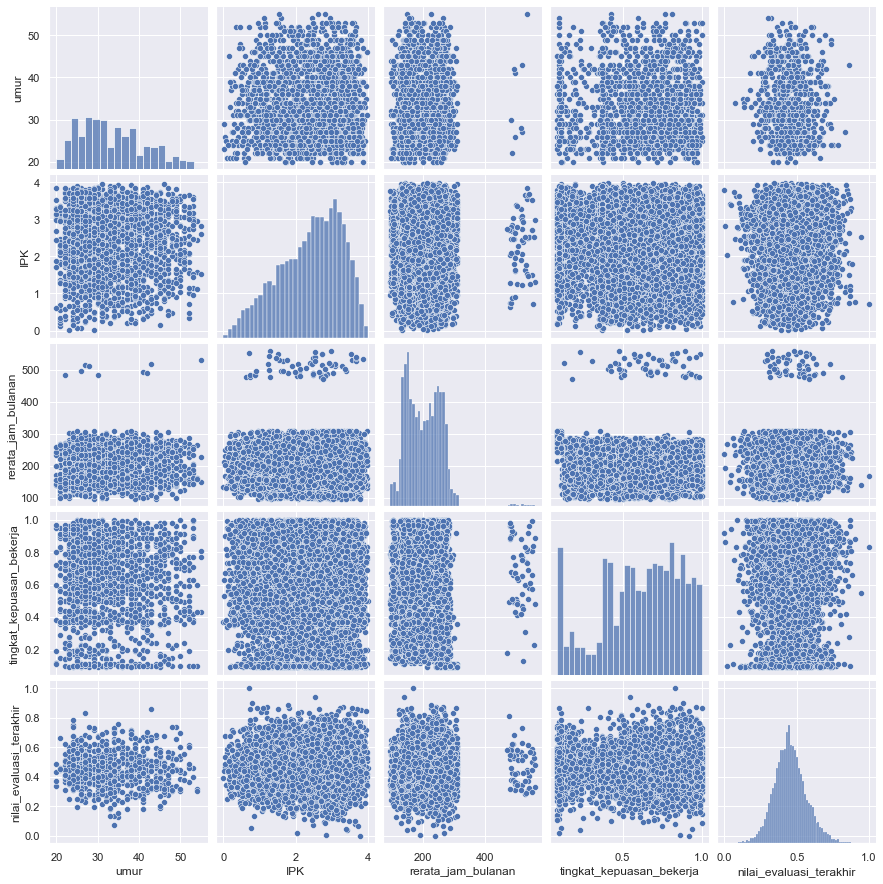

In [17]:
f = plt.figure(figsize=(10,10))
sns.pairplot(train[numeric_cols])

## 2.2 Categorical Features

In [18]:
train.columns

Index(['employee_id', 'umur', 'jenis_kelamin', 'IPK', 'level', 'tahun_lulus',
       'status_perkawinan', 'divisi', 'rerata_jam_bulanan',
       'tingkat_kepuasan_bekerja', 'nilai_evaluasi_terakhir',
       'jumlah_proyek_yang_dikerjakan', 'lama_di_perusahaan',
       'kecelakaan_kerja', 'promosi_5thn_lalu', 'tingkat_gaji', 'resign'],
      dtype='object')

In [19]:
train.head()

,employee_id,umur,jenis_kelamin,IPK,level,tahun_lulus,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,kecelakaan_kerja,promosi_5thn_lalu,tingkat_gaji,resign
0,10000,NaN,Laki-laki,1.947303,Junior,NaN,Sudah Menikah,management,210.0,0.82,0.419035,3,3 Years,belum pernah,belum,sedang,0
1,10001,NaN,Laki-laki,3.218346,Full-Time,NaN,Belum Menikah,sales,189.0,0.76,0.558254,3,24 Months,belum pernah,belum,rendah,0
2,10002,NaN,Laki-laki,2.117364,Senior,NaN,Sudah Menikah,management,NaN,0.81,0.580364,5,2 Years,pernah,belum,tinggi,0
3,10003,NaN,Laki-laki,3.178748,Full-Time,NaN,Belum Menikah,sales,121.0,0.84,0.446109,3,36 Months,pernah,belum,rendah,0
4,10004,34.0,Laki-laki,2.680535,Part-Time,2008.0,Belum Menikah,technical,229.0,0.48,NaN,3,3 Years,belum pernah,belum,rendah,0


In [82]:
categorical_cols = ['jenis_kelamin','level','tahun_lulus','status_perkawinan','divisi',
                    'jumlah_proyek_yang_dikerjakan','lama_di_perusahaan','kecelakaan_kerja','promosi_5thn_lalu','tingkat_gaji']

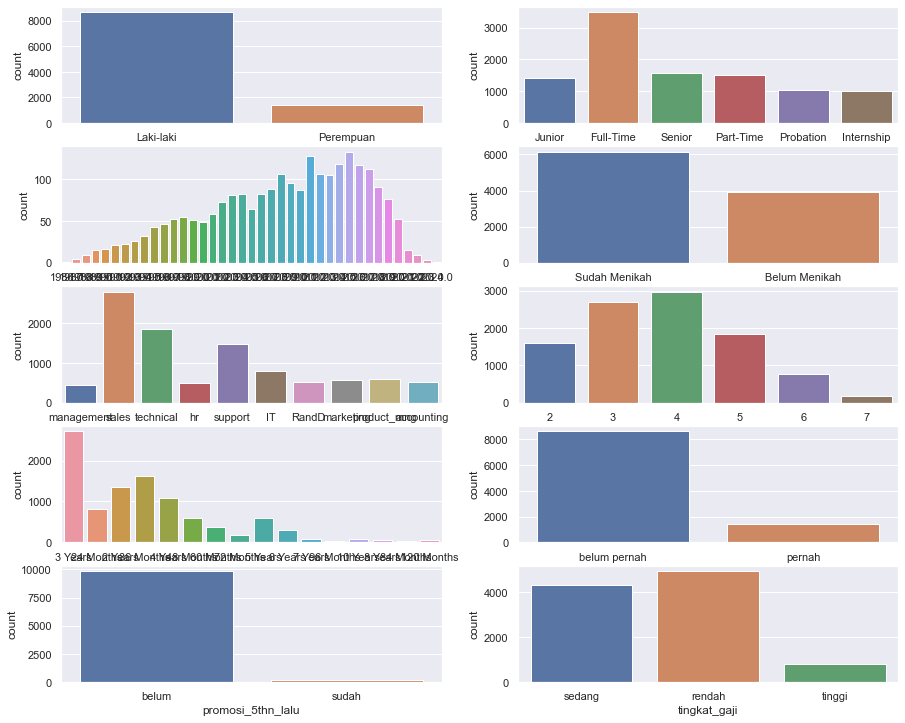

In [93]:
# Plot all Categorical Cols
fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6), (ax7,ax8),(ax9,ax10),(ax11,ax12)) = plt.subplots(6,2,figsize=(15,15))
ax11.remove()
ax12.remove()


for ax,col in zip(fig.axes, categorical_cols):
    sns.countplot(x=train[col], ax=ax)

    
f.tight_layout()

In [92]:
categorical_cols1 = ['lama_di_perusahaan','kecelakaan_kerja','promosi_5thn_lalu','tingkat_gaji']

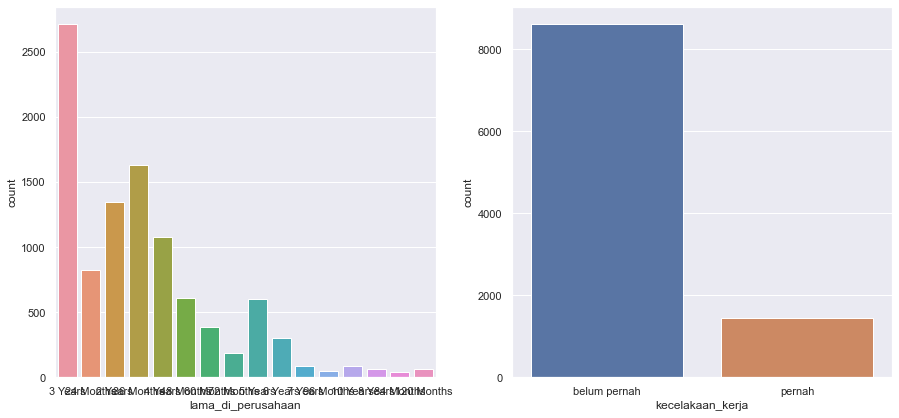

In [95]:
# Plot all Categorical Cols
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,15))
ax3.remove()
ax4.remove()


for ax,col in zip(fig.axes, categorical_cols1):
    sns.countplot(x=train[col], ax=ax)

    
f.tight_layout()

## 2.3 Cross Tabulation w.r.t Target

In [22]:
ctab = pd.crosstab(train['level'], train['resign'])
ctab

resign,0,1
level,,
Full-Time,2642,846
Internship,775,244
Junior,1068,360
Part-Time,1152,357
Probation,819,215
Senior,1201,370


<AxesSubplot:xlabel='level'>

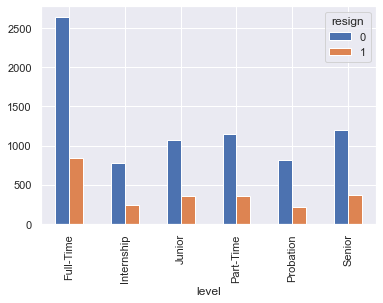

In [23]:
ctab.plot(kind='bar')

## 2.4 Proportion of Labels

Text(0.5, 1.0, 'Resign Proportion')

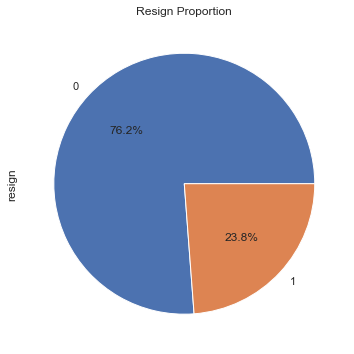

In [25]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,6))
train['resign'].value_counts(normalize=True).plot(ax=ax1, kind='pie',autopct="%.1f%%")
plt.title('Resign Proportion')

## 2.5 Missing Values

Text(0, 0.5, 'Percentage Missing')

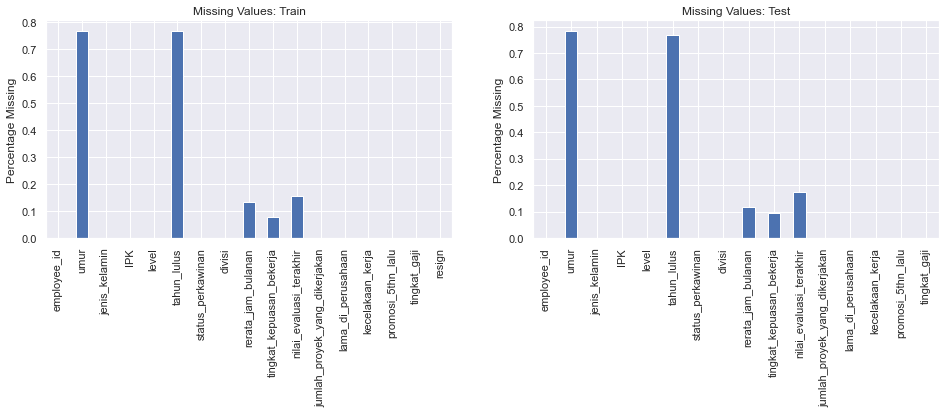

In [24]:
# Missing Values
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

sns.color_palette("mako", as_cmap=True)
(train.isna().sum()/train.shape[0]).plot(kind='bar', ax=ax1)
ax1.set_title('Missing Values: Train')
ax1.set_ylabel('Percentage Missing')

(test.isna().sum()/test.shape[0]).plot(kind='bar', ax=ax2)
ax2.set_title('Missing Values: Test')
ax2.set_ylabel('Percentage Missing')

## 2.6 Distribution of Resign on Columns

<AxesSubplot:xlabel='divisi', ylabel='count'>

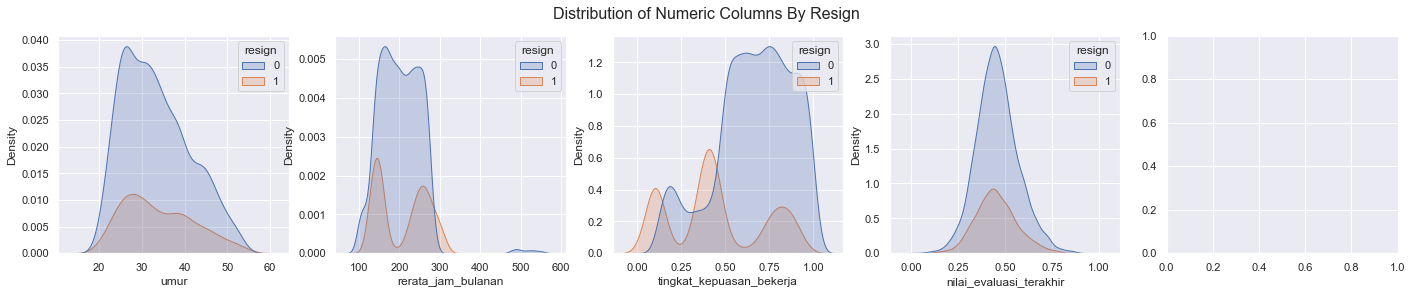

In [101]:
# Distribution of Numeric Columns By Response
fig, (ax1,ax2,ax3, ax4,x5) = plt.subplots(1, 5,figsize=(24,4))

fig.suptitle('Distribution of Numeric Columns By Resign', fontsize=16)

sns.kdeplot(ax=ax1, x='umur', hue='resign', data=train, shade=True)
sns.kdeplot(ax=ax2, x='rerata_jam_bulanan', hue='resign', data=train, shade=True)
sns.kdeplot(ax=ax3, x='tingkat_kepuasan_bekerja', hue='resign', data=train, shade=True)
sns.kdeplot(ax=ax4, x='nilai_evaluasi_terakhir', hue='resign', data=train, shade=True)
sns.kdeplot(ax=ax5, x='IPK', hue='resign', data=train, shade=True)

<AxesSubplot:xlabel='IPK', ylabel='Density'>

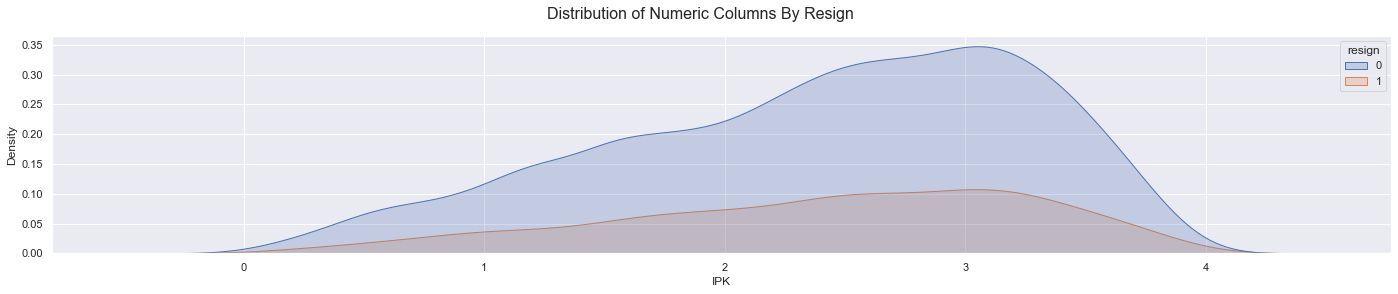

In [102]:
# Distribution of Numeric Columns By Response
fig, (ax1) = plt.subplots(1, 1,figsize=(24,4))

fig.suptitle('Distribution of Numeric Columns By Resign', fontsize=16)

sns.kdeplot(ax=ax1, x='IPK', hue='resign', data=train, shade=True)

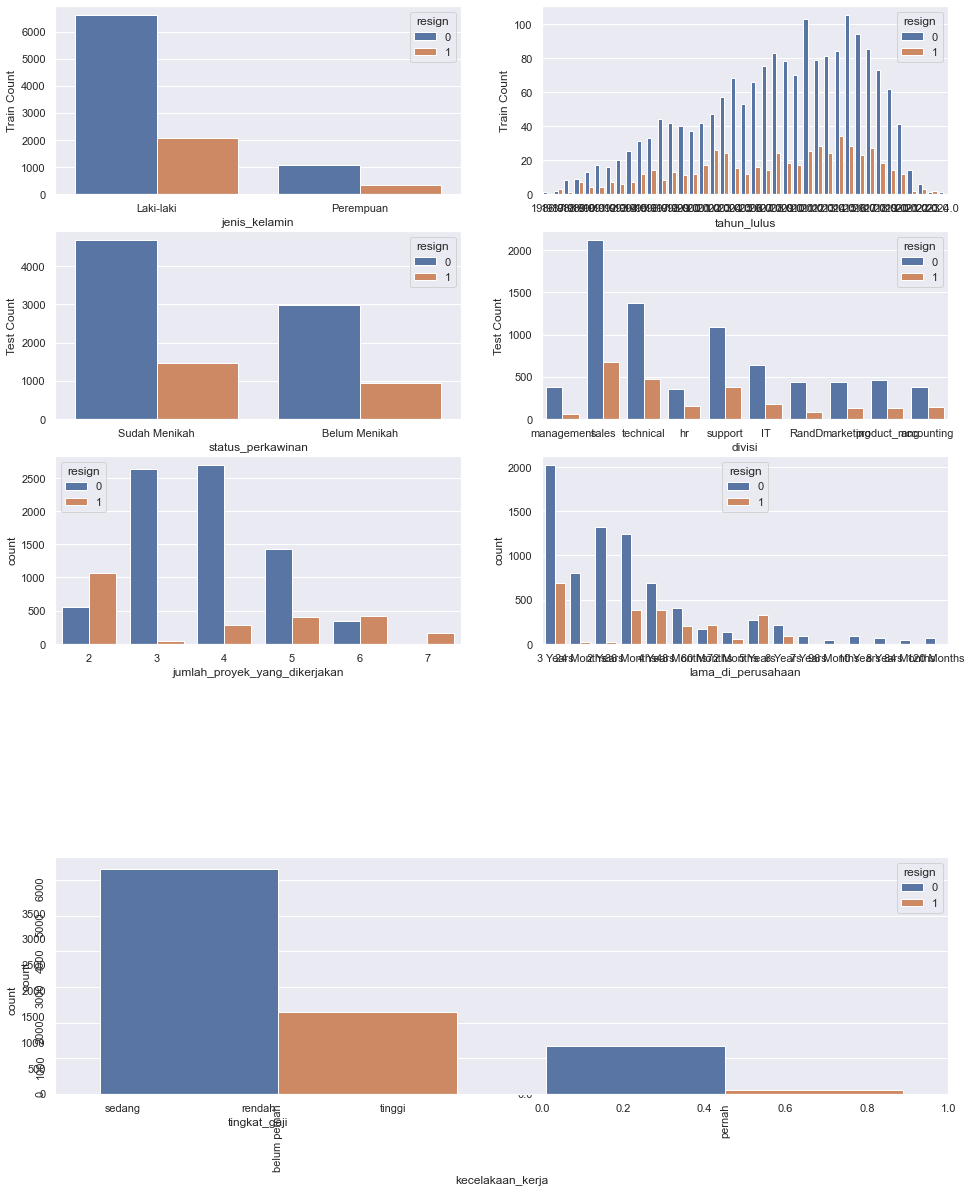

In [26]:
# Distribution of ____ By Target
fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6), (ax7,ax8), (ax9,ax10)) = plt.subplots(5,2,figsize=(16,20))
ax7.remove()
ax8.remove()

ax7 = fig.add_subplot(414)

sns.countplot(ax=ax1, x='jenis_kelamin', hue='resign', data=train)
sns.countplot(ax=ax2, x='tahun_lulus', hue='resign', data=train)
sns.countplot(ax=ax3, x='status_perkawinan', hue='resign', data=train)
sns.countplot(ax=ax4, x='divisi', hue='resign', data=train)
sns.countplot(ax=ax5, x='jumlah_proyek_yang_dikerjakan', hue='resign', data=train)
sns.countplot(ax=ax6, x='lama_di_perusahaan', hue='resign', data=train)
sns.countplot(ax=ax7, x='kecelakaan_kerja', hue='resign', data=train)
sns.countplot(ax=ax8, x='promosi_5thn_lalu', hue='resign', data=train)
sns.countplot(ax=ax9, x='tingkat_gaji', hue='resign', data=train)


ax1.set_ylabel('Train Count')
ax2.set_ylabel('Train Count')
ax3.set_ylabel('Test Count')
ax4.set_ylabel('Test Count')

ax7.tick_params(rotation=90)

Text(0.5, 1.0, 'Heatmap')

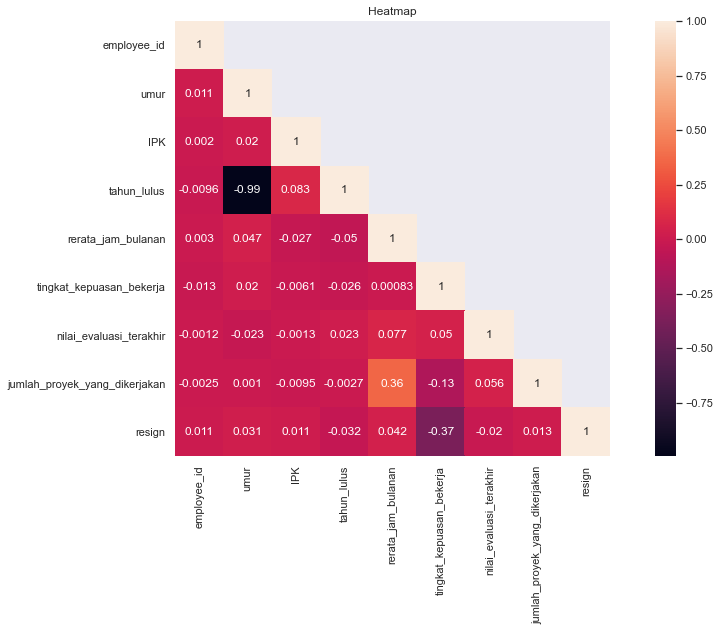

In [27]:
# Plot Data Correlations
fig, ax1 = plt.subplots(1, 1, figsize=(16,8))

#
mask = np.array(train.corr())
mask[np.tril_indices_from(mask)] = False


sns.heatmap(train.corr(), mask=mask, ax=ax1, annot=True, square=True)
ax1.set_title('Heatmap')

# 3. Data Preprocessing

In [37]:
# Create copy of train & test data for preprocessing
train_pp = train.copy()
test_pp = test.copy()

In [5]:
train_pp.head()

,employee_id,umur,jenis_kelamin,IPK,level,tahun_lulus,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,kecelakaan_kerja,promosi_5thn_lalu,tingkat_gaji,resign
0,10000,NaN,Laki-laki,1.947303,Junior,NaN,Sudah Menikah,management,210.0,0.82,0.419035,3,3 Years,belum pernah,belum,sedang,0
1,10001,NaN,Laki-laki,3.218346,Full-Time,NaN,Belum Menikah,sales,189.0,0.76,0.558254,3,24 Months,belum pernah,belum,rendah,0
2,10002,NaN,Laki-laki,2.117364,Senior,NaN,Sudah Menikah,management,NaN,0.81,0.580364,5,2 Years,pernah,belum,tinggi,0
3,10003,NaN,Laki-laki,3.178748,Full-Time,NaN,Belum Menikah,sales,121.0,0.84,0.446109,3,36 Months,pernah,belum,rendah,0
4,10004,34.0,Laki-laki,2.680535,Part-Time,2008.0,Belum Menikah,technical,229.0,0.48,NaN,3,3 Years,belum pernah,belum,rendah,0


## 3.1 Drop "employee_id", "umur", and "tahun_lulus" columns

In [38]:
# Delete useless columns 
# if data is missing for more than 60% of the observations, it may be wise to discard it if the variable is insignificant. (Korean Journal of Anesthesiology)
train_pp = train_pp.drop(['employee_id','umur', 'tahun_lulus','kecelakaan_kerja','IPK','promosi_5thn_lalu'], axis=1)
test_pp = test_pp.drop(['employee_id','umur', 'tahun_lulus','kecelakaan_kerja','IPK','promosi_5thn_lalu'], axis=1)

In [7]:
train_pp.head()

,level,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,tingkat_gaji,resign
0,Junior,Sudah Menikah,management,210.0,0.82,0.419035,3,3 Years,sedang,0
1,Full-Time,Belum Menikah,sales,189.0,0.76,0.558254,3,24 Months,rendah,0
2,Senior,Sudah Menikah,management,NaN,0.81,0.580364,5,2 Years,tinggi,0
3,Full-Time,Belum Menikah,sales,121.0,0.84,0.446109,3,36 Months,rendah,0
4,Part-Time,Belum Menikah,technical,229.0,0.48,NaN,3,3 Years,rendah,0


In [11]:
test_pp.head()

,jenis_kelamin,IPK,level,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,kecelakaan_kerja,tingkat_gaji
0,Laki-laki,2.119406,Senior,Belum Menikah,technical,137.0,0.38,0.372242,2,36 Months,belum pernah,rendah
1,Laki-laki,2.554876,Part-Time,Sudah Menikah,sales,258.0,0.85,0.334727,3,3 Years,belum pernah,sedang
2,Laki-laki,1.151644,Probation,Sudah Menikah,marketing,257.0,0.91,0.459594,3,36 Months,belum pernah,sedang
3,Perempuan,1.963498,Senior,Belum Menikah,sales,142.0,0.42,0.370912,2,3 Years,belum pernah,rendah
4,Perempuan,1.666068,Junior,Belum Menikah,sales,272.0,0.93,0.563354,3,2 Years,pernah,rendah


## 3.2 Impute Missing Data

In [17]:
train_pp.head()

,jenis_kelamin,level,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,tingkat_gaji,resign
0,Laki-laki,Junior,Sudah Menikah,management,210.0,0.82,0.419035,3,3 Years,sedang,0
1,Laki-laki,Full-Time,Belum Menikah,sales,189.0,0.76,0.558254,3,24 Months,rendah,0
2,Laki-laki,Senior,Sudah Menikah,management,200.0,0.81,0.580364,5,2 Years,tinggi,0
3,Laki-laki,Full-Time,Belum Menikah,sales,121.0,0.84,0.446109,3,36 Months,rendah,0
4,Laki-laki,Part-Time,Belum Menikah,technical,229.0,0.48,0.455847,3,3 Years,rendah,0


In [45]:
#outlier rerata_jam_bulanan
Q1 = np.percentile(train_pp['rerata_jam_bulanan'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(train_pp['rerata_jam_bulanan'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", train_pp.shape) 
  
# Upper bound
upper = np.where(train_pp['rerata_jam_bulanan'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(train_pp['rerata_jam_bulanan'] <= (Q1-1.5*IQR))
  
''' Removing the Outliers '''
train_pp.drop(upper[0], inplace = True)
train_pp.drop(lower[0], inplace = True)
print("New Shape: ", train_pp.shape)
Q1

Old Shape:  (10049, 11)
New Shape:  (9986, 11)


160.0

In [46]:
#Please use the below function which would apply on all the columns you have in #df
def cap_data(train_pp):
    for col in train_pp.columns[6:7]:
        print("capping the ",col)
        if (((train_pp[col].dtype)=='float64') | ((train_pp[col].dtype)=='int64')):
            percentiles = train_pp[col].quantile([0.25,0.75]).values
            train_pp[col][train_pp[col] <= percentiles[0]] = percentiles[0]
            train_pp[col][train_pp[col] >= percentiles[1]] = percentiles[1]
        else:
            train_pp[col]=train_pp[col]
    return train_pp

train_pp=cap_data(train_pp)

capping the  nilai_evaluasi_terakhir


In [19]:
train_pp.describe()

,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,resign
count,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000
mean,200.631885,0.613830,0.451336,3.799319,0.239435
std,46.825470,0.238236,0.043144,1.230388,0.426760
min,96.000000,0.090000,0.395678,2.000000,0.000000
25%,160.000000,0.450000,0.395687,3.000000,0.000000
50%,200.000000,0.640000,0.455847,4.000000,0.000000
75%,239.000000,0.800000,0.506164,5.000000,0.000000
max,310.000000,1.000000,0.506175,7.000000,1.000000


In [39]:
# Initialize SimpleImputer class
jambulanan_imputer = SimpleImputer(strategy='median')

In [40]:
# Fill missing values in 'rerata_jam_bulanan' column
train_pp['rerata_jam_bulanan'] = jambulanan_imputer.fit_transform(train_pp['rerata_jam_bulanan'].values.reshape(-1,1))

In [10]:
train_pp.head()

,jenis_kelamin,level,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,tingkat_gaji,resign
0,Laki-laki,Junior,Sudah Menikah,management,210.0,0.82,0.419035,3,3 Years,sedang,0
1,Laki-laki,Full-Time,Belum Menikah,sales,189.0,0.76,0.558254,3,24 Months,rendah,0
2,Laki-laki,Senior,Sudah Menikah,management,200.0,0.81,0.580364,5,2 Years,tinggi,0
3,Laki-laki,Full-Time,Belum Menikah,sales,121.0,0.84,0.446109,3,36 Months,rendah,0
4,Laki-laki,Part-Time,Belum Menikah,technical,229.0,0.48,NaN,3,3 Years,rendah,0


In [41]:
# Initialize SimpleImputer class
tingkatkepuasan_imputer = SimpleImputer(strategy='median')

In [42]:
# Fill missing values in 'tingkat_kepuasan_bekerja' column
train_pp['tingkat_kepuasan_bekerja'] = tingkatkepuasan_imputer.fit_transform(train_pp['tingkat_kepuasan_bekerja'].values.reshape(-1,1))

In [43]:
# Initialize SimpleImputer class
nilaievaluasi_imputer = SimpleImputer(strategy='mean')

In [44]:
# Fill missing values in 'nilai_evaluasi_terakhir' column
train_pp['nilai_evaluasi_terakhir'] = nilaievaluasi_imputer.fit_transform(train_pp['nilai_evaluasi_terakhir'].values.reshape(-1,1))

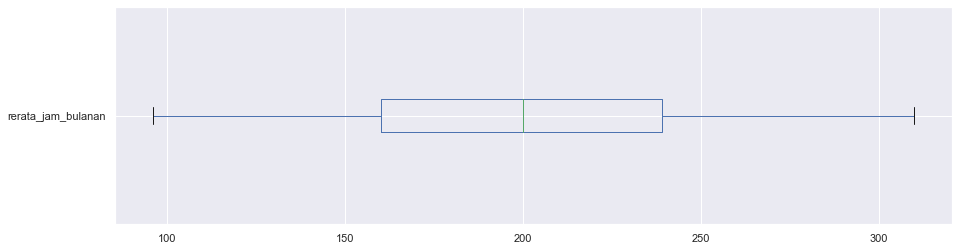

In [21]:
# Box plot
plt.figure(figsize=(15,4))
train_pp['rerata_jam_bulanan'].plot(kind='box', vert=False)

plt.show()

## 3.3 Encoding categorical variable

In [21]:
train_pp.dtypes

jenis_kelamin                     object
IPK                              float64
level                             object
status_perkawinan                 object
divisi                            object
rerata_jam_bulanan               float64
tingkat_kepuasan_bekerja         float64
nilai_evaluasi_terakhir          float64
jumlah_proyek_yang_dikerjakan      int64
lama_di_perusahaan                object
kecelakaan_kerja                  object
promosi_5thn_lalu                 object
tingkat_gaji                      object
resign                             int64
dtype: object

In [40]:
train_pp['lama_di_perusahaan'].value_counts()

3 Years     4316
2 Years     2139
4 Years     1678
5 Years      983
6 Years      490
10 Years     150
7 Years      126
8 Years      104
Name: lama_di_perusahaan, dtype: int64

In [47]:
train_pp['lama_di_perusahaan'] = train_pp['lama_di_perusahaan'].replace({'120 Months': '10 Years'})

In [48]:
train_pp['lama_di_perusahaan'] = train_pp['lama_di_perusahaan'].replace({'96 Months': '8 Years'})

In [49]:
train_pp['lama_di_perusahaan'] = train_pp['lama_di_perusahaan'].replace({'84 Months': '7 Years'})

In [50]:
train_pp['lama_di_perusahaan'] = train_pp['lama_di_perusahaan'].replace({'72 Months': '6 Years'})

In [51]:
train_pp['lama_di_perusahaan'] = train_pp['lama_di_perusahaan'].replace({'60 Months': '5 Years'})

In [52]:
train_pp['lama_di_perusahaan'] = train_pp['lama_di_perusahaan'].replace({'48 Months': '4 Years'})

In [53]:
train_pp['lama_di_perusahaan'] = train_pp['lama_di_perusahaan'].replace({'36 Months': '3 Years'})

In [54]:
train_pp['lama_di_perusahaan'] = train_pp['lama_di_perusahaan'].replace({'24 Months': '2 Years'})

In [41]:
test_pp['lama_di_perusahaan'].value_counts()

3 Years     2106
2 Years     1078
4 Years      875
5 Years      485
6 Years      227
10 Years      63
7 Years       60
8 Years       56
Name: lama_di_perusahaan, dtype: int64

In [55]:
test_pp['lama_di_perusahaan'] = test_pp['lama_di_perusahaan'].replace({'120 Months': '10 Years'})

In [56]:
test_pp['lama_di_perusahaan'] = test_pp['lama_di_perusahaan'].replace({'96 Months': '8 Years'})

In [57]:
test_pp['lama_di_perusahaan'] = test_pp['lama_di_perusahaan'].replace({'84 Months': '7 Years'})

In [58]:
test_pp['lama_di_perusahaan'] = test_pp['lama_di_perusahaan'].replace({'72 Months': '6 Years'})

In [59]:
test_pp['lama_di_perusahaan'] = test_pp['lama_di_perusahaan'].replace({'60 Months': '5 Years'})

In [60]:
test_pp['lama_di_perusahaan'] = test_pp['lama_di_perusahaan'].replace({'48 Months': '4 Years'})

In [61]:
test_pp['lama_di_perusahaan'] = test_pp['lama_di_perusahaan'].replace({'36 Months': '3 Years'})

In [62]:
test_pp['lama_di_perusahaan'] = test_pp['lama_di_perusahaan'].replace({'24 Months': '2 Years'})

In [39]:
train_pp.head()

,jenis_kelamin,IPK,level,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,promosi_5thn_lalu,tingkat_gaji,resign
0,Laki-laki,1.947303,Junior,Sudah Menikah,management,210.0,0.82,0.419035,3,3 Years,belum,sedang,0
1,Laki-laki,3.218346,Full-Time,Belum Menikah,sales,189.0,0.76,0.455847,3,2 Years,belum,rendah,0
2,Laki-laki,2.117364,Senior,Sudah Menikah,management,200.0,0.81,0.455847,5,2 Years,belum,tinggi,0
3,Laki-laki,3.178748,Full-Time,Belum Menikah,sales,121.0,0.84,0.446109,3,3 Years,belum,rendah,0
4,Laki-laki,2.680535,Part-Time,Belum Menikah,technical,229.0,0.48,0.455847,3,3 Years,belum,rendah,0


In [40]:
test_pp.head()

,jenis_kelamin,IPK,level,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,promosi_5thn_lalu,tingkat_gaji
0,Laki-laki,2.119406,Senior,Belum Menikah,technical,137.0,0.38,0.372242,2,3 Years,belum,rendah
1,Laki-laki,2.554876,Part-Time,Sudah Menikah,sales,258.0,0.85,0.334727,3,3 Years,belum,sedang
2,Laki-laki,1.151644,Probation,Sudah Menikah,marketing,257.0,0.91,0.459594,3,3 Years,belum,sedang
3,Perempuan,1.963498,Senior,Belum Menikah,sales,142.0,0.42,0.370912,2,3 Years,belum,rendah
4,Perempuan,1.666068,Junior,Belum Menikah,sales,272.0,0.93,0.563354,3,2 Years,belum,rendah


In [47]:
train_pp.dtypes

jenis_kelamin                     object
IPK                              float64
level                             object
status_perkawinan                 object
divisi                            object
rerata_jam_bulanan               float64
tingkat_kepuasan_bekerja         float64
nilai_evaluasi_terakhir          float64
jumlah_proyek_yang_dikerjakan      int64
lama_di_perusahaan                object
kecelakaan_kerja                  object
promosi_5thn_lalu                 object
tingkat_gaji                      object
resign                             int64
dtype: object

In [63]:
# Encode object-type columns
train_pp = pd.get_dummies(train_pp, drop_first=True)
test_pp = pd.get_dummies(test_pp, drop_first=True)

In [64]:
train_pp.shape

(9986, 30)

In [125]:
print(test_pp.columns)

Index(['IPK', 'rerata_jam_bulanan', 'tingkat_kepuasan_bekerja',
       'nilai_evaluasi_terakhir', 'jumlah_proyek_yang_dikerjakan',
       'jenis_kelamin_Perempuan', 'level_Internship', 'level_Junior',
       'level_Part-Time', 'level_Probation', 'level_Senior',
       'status_perkawinan_Sudah Menikah', 'divisi_RandD', 'divisi_accounting',
       'divisi_hr', 'divisi_management', 'divisi_marketing',
       'divisi_product_mng', 'divisi_sales', 'divisi_support',
       'divisi_technical', 'lama_di_perusahaan_2 Years',
       'lama_di_perusahaan_3 Years', 'lama_di_perusahaan_4 Years',
       'lama_di_perusahaan_5 Years', 'lama_di_perusahaan_6 Years',
       'lama_di_perusahaan_7 Years', 'lama_di_perusahaan_8 Years',
       'kecelakaan_kerja_pernah', 'promosi_5thn_lalu_sudah',
       'tingkat_gaji_sedang', 'tingkat_gaji_tinggi'],
      dtype='object')


In [44]:
list(train_pp.columns)

['rerata_jam_bulanan',
 'tingkat_kepuasan_bekerja',
 'nilai_evaluasi_terakhir',
 'jumlah_proyek_yang_dikerjakan',
 'resign',
 'jenis_kelamin_Perempuan',
 'level_Internship',
 'level_Junior',
 'level_Part-Time',
 'level_Probation',
 'level_Senior',
 'status_perkawinan_Sudah Menikah',
 'divisi_RandD',
 'divisi_accounting',
 'divisi_hr',
 'divisi_management',
 'divisi_marketing',
 'divisi_product_mng',
 'divisi_sales',
 'divisi_support',
 'divisi_technical',
 'lama_di_perusahaan_2 Years',
 'lama_di_perusahaan_3 Years',
 'lama_di_perusahaan_4 Years',
 'lama_di_perusahaan_5 Years',
 'lama_di_perusahaan_6 Years',
 'lama_di_perusahaan_7 Years',
 'lama_di_perusahaan_8 Years',
 'tingkat_gaji_sedang',
 'tingkat_gaji_tinggi']

In [120]:
train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10049 entries, 0 to 10048
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IPK                              10049 non-null  float64
 1   rerata_jam_bulanan               10049 non-null  float64
 2   tingkat_kepuasan_bekerja         10049 non-null  float64
 3   nilai_evaluasi_terakhir          10049 non-null  float64
 4   jumlah_proyek_yang_dikerjakan    10049 non-null  int64  
 5   resign                           10049 non-null  int64  
 6   jenis_kelamin_Perempuan          10049 non-null  uint8  
 7   level_Internship                 10049 non-null  uint8  
 8   level_Junior                     10049 non-null  uint8  
 9   level_Part-Time                  10049 non-null  uint8  
 10  level_Probation                  10049 non-null  uint8  
 11  level_Senior                     10049 non-null  uint8  
 12  status_perkawinan_

In [45]:
train_pp['jumlah_proyek_yang_dikerjakan'].value_counts()

4    2941
3    2657
5    1842
2    1612
6     767
7     167
Name: jumlah_proyek_yang_dikerjakan, dtype: int64

# Modelling & Evaluation

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [66]:
# Splitting into train and validation set
# Cross-validation could also be used if the dataset is limited
train_x, test_x, train_y, test_y = train_test_split(train_pp.drop(columns='resign'), train_pp['resign'], test_size=0.2, random_state=134)

In [41]:
lg = LogisticRegression()
lg.fit(train_x, train_y)
pred = lg.predict(test_x)

print('Classification report model')
print(classification_report(test_y, pred, digits=5))

Classification report model
              precision    recall  f1-score   support

           0    0.83871   0.92557   0.88000      1545
           1    0.60751   0.39294   0.47721       453

    accuracy                        0.80480      1998
   macro avg    0.72311   0.65925   0.67861      1998
weighted avg    0.78629   0.80480   0.78868      1998



In [42]:
dt = DecisionTreeClassifier(random_state=777)
dt.fit(train_x, train_y)
pred = dt.predict(test_x)

print('Classification report model')
print(classification_report(test_y, pred, digits=5))

Classification report model
              precision    recall  f1-score   support

           0    0.97658   0.97152   0.97404      1545
           1    0.90456   0.92053   0.91247       453

    accuracy                        0.95996      1998
   macro avg    0.94057   0.94603   0.94326      1998
weighted avg    0.96025   0.95996   0.96008      1998



In [43]:
# Support Vector Classifier
svc = SVC(random_state=69)
svc.fit(train_x, train_y)
pred = svc.predict(test_x)

print('Classification report model')
print(classification_report(test_y, pred, digits=5))

Classification report model
              precision    recall  f1-score   support

           0    0.77327   1.00000   0.87214      1545
           1    0.00000   0.00000   0.00000       453

    accuracy                        0.77327      1998
   macro avg    0.38664   0.50000   0.43607      1998
weighted avg    0.59795   0.77327   0.67440      1998



In [44]:
rf = RandomForestClassifier(random_state=69)
rf.fit(train_x, train_y)
pred = rf.predict(test_x)

print('Classification report model')
print(classification_report(test_y, pred, digits=5))

#paling tinggi

Classification report model
              precision    recall  f1-score   support

           0    0.97455   0.99159   0.98300      1545
           1    0.96948   0.91170   0.93970       453

    accuracy                        0.97347      1998
   macro avg    0.97202   0.95164   0.96135      1998
weighted avg    0.97340   0.97347   0.97318      1998



In [67]:
# XGBoost

from xgboost import XGBClassifier

xgbcl = XGBClassifier()

xgbcl.fit(train_x,train_y)

pred_xg = xgbcl.predict(test_x)

print('Classification report model')
print(classification_report(test_y, pred_xg, digits=5))

[14:57:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report model
              precision    recall  f1-score   support

           0    0.98010   0.98835   0.98421      1545
           1    0.95909   0.93157   0.94513       453

    accuracy                        0.97548      1998
   macro avg    0.96960   0.95996   0.96467      1998
weighted avg    0.97534   0.97548   0.97535      1998



In [46]:
#Light gbm

import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(train_x, train_y)
pred_lgb = clf.predict(test_x)

print('Classification report model')
print(classification_report(test_y, pred_lgb, digits=5))

Classification report model
              precision    recall  f1-score   support

           0    0.97947   0.98835   0.98389      1545
           1    0.95900   0.92936   0.94395       453

    accuracy                        0.97497      1998
   macro avg    0.96924   0.95885   0.96392      1998
weighted avg    0.97483   0.97497   0.97484      1998



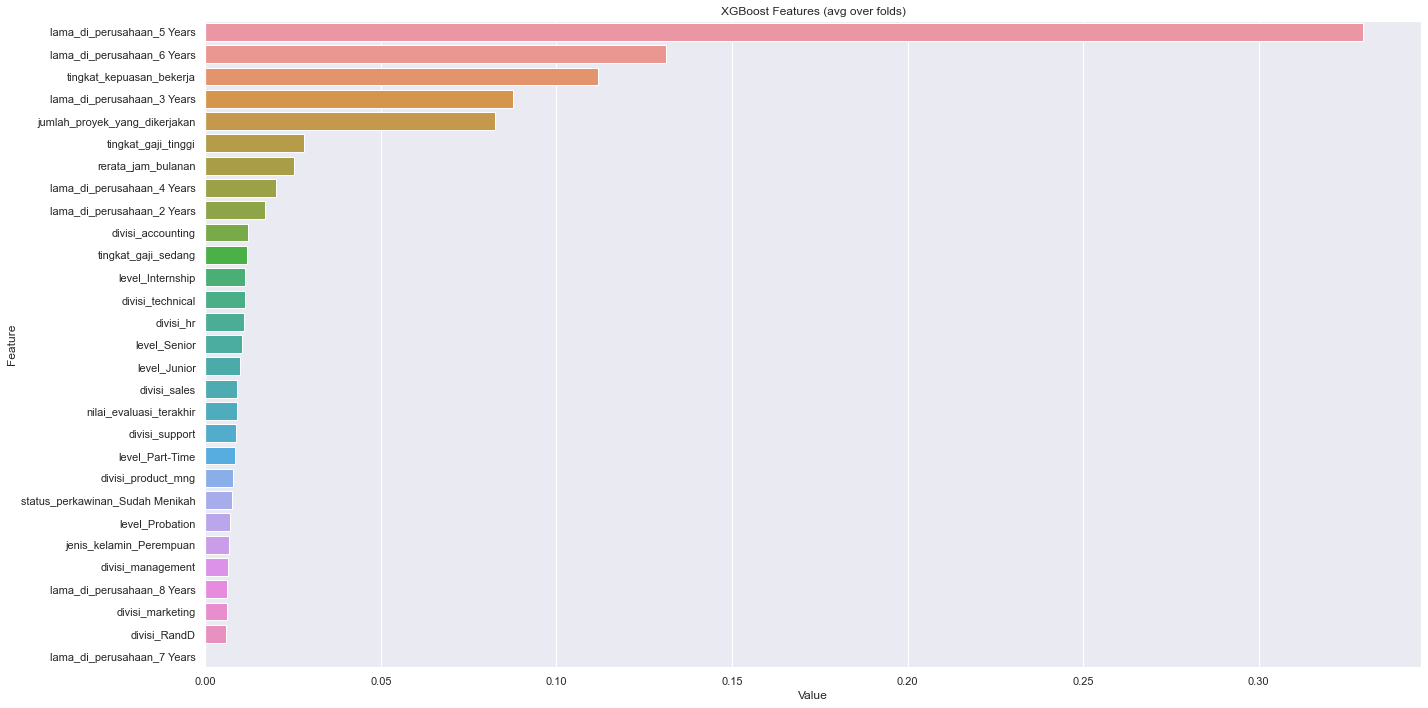

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(xgbcl.feature_importances_,train_x.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGBoost Features (avg over folds)')
plt.tight_layout()
plt.show()

Feature: 0, Score: 0.02532
Feature: 1, Score: 0.11184
Feature: 2, Score: 0.00890
Feature: 3, Score: 0.08257
Feature: 4, Score: 0.00674
Feature: 5, Score: 0.01120
Feature: 6, Score: 0.00997
Feature: 7, Score: 0.00858
Feature: 8, Score: 0.00693
Feature: 9, Score: 0.01031
Feature: 10, Score: 0.00773
Feature: 11, Score: 0.00575
Feature: 12, Score: 0.01213
Feature: 13, Score: 0.01088
Feature: 14, Score: 0.00659
Feature: 15, Score: 0.00610
Feature: 16, Score: 0.00788
Feature: 17, Score: 0.00897
Feature: 18, Score: 0.00863
Feature: 19, Score: 0.01120
Feature: 20, Score: 0.01697
Feature: 21, Score: 0.08771
Feature: 22, Score: 0.02003
Feature: 23, Score: 0.32980
Feature: 24, Score: 0.13112
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00630
Feature: 27, Score: 0.01186
Feature: 28, Score: 0.02800


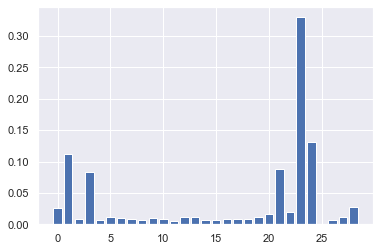

In [68]:
from matplotlib import pyplot
importance = xgbcl.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [55]:
from xgboost import XGBClassifier
xgbcl = XGBClassifier()
xgbcl.fit(train_x,train_y)

[20:09:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

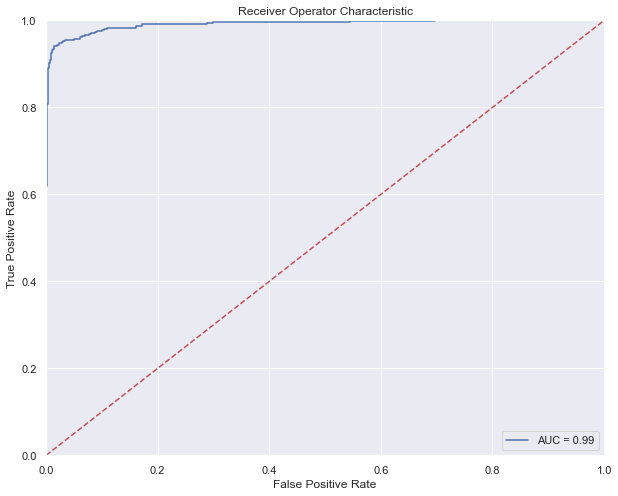

In [56]:
PredictProb = xgbcl.predict_proba(test_x)
preds = PredictProb[:,1]
fpr, tpr, threshold = roc_curve(test_y, preds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred_xg) 


array([[1527,   18],
       [  31,  422]], dtype=int64)

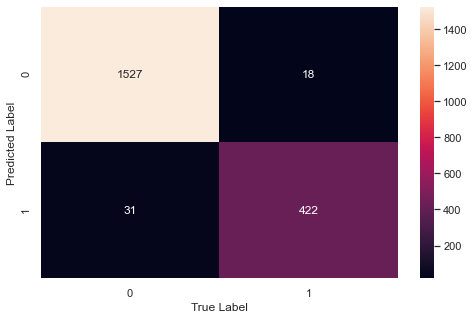

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(test_y,pred_xg), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

In [71]:
(1527-422)+(18-31)

1092

## Impute Missing Values in Test Database

In [53]:
# Fill missing values in 'rerata_jam_bulanan' column
median_value=train_pp['rerata_jam_bulanan'].median()
test_pp['rerata_jam_bulanan']=test_pp['rerata_jam_bulanan'].fillna(median_value)

In [54]:
# Fill missing values in 'tingkat_kepuasan_bekerja' column
median_value_kepuasan=train_pp['tingkat_kepuasan_bekerja'].median()
test_pp['tingkat_kepuasan_bekerja']=test_pp['tingkat_kepuasan_bekerja'].fillna(median_value_kepuasan)

In [55]:
# Fill missing values in 'nilai_evaluasi_terakhir' column
mean_value_evaluasi=train_pp['nilai_evaluasi_terakhir'].mean()
test_pp['nilai_evaluasi_terakhir']=test_pp['nilai_evaluasi_terakhir'].fillna(mean_value_evaluasi)

In [57]:
#XGBoost

pred_test_xg = xgbcl.predict(test_pp)
print(test_pp, pred_test_xg)

      rerata_jam_bulanan  tingkat_kepuasan_bekerja  nilai_evaluasi_terakhir  \
0                  137.0                      0.38                 0.372242   
1                  258.0                      0.85                 0.334727   
2                  257.0                      0.91                 0.459594   
3                  142.0                      0.42                 0.370912   
4                  272.0                      0.93                 0.563354   
...                  ...                       ...                      ...   
4945               211.0                      0.65                 0.333388   
4946               153.0                      0.56                 0.478638   
4947               191.0                      0.94                 0.451336   
4948               200.0                      0.96                 0.451336   
4949               268.0                      0.65                 0.298889   

      jumlah_proyek_yang_dikerjakan  jenis_kelamin_

In [58]:
res_xg = pd.DataFrame(pred_test_xg) #res=result
res_xg.index = test['employee_id'] # its important for comparison
res_xg.columns = ["resign"]
res_xg.to_csv("prediction_results_xg_fix.csv")